## Amazon Yorumları Üzerinde Gözetimsiz Öğrenme (Clustering)

Bu notebook'ta, Amazon ürün yorumları üzerinde **etiket kullanmadan** gözetimsiz öğrenme yöntemi uygulanmıştır. Amaç, benzer içeriklere sahip yorumları **otomatik olarak kümelere ayırmak** ve her bir kümenin karakteristik özelliklerini analiz etmektir.


In [2]:
!pip install wordcloud
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Veri Setinin Yüklenmesi

Amazon ürün yorumlarından oluşan veri seti Pandas ile yükleniyor. Bu veri setinde yalnızca yorum metinleri (`Text`) kullanılacaktır.


In [3]:
df =pd.read_csv("Reviews.csv")

## Metin Temizleme

Yorumların daha sağlıklı analiz edilebilmesi için:
- Küçük harfe çevirme
- Noktalama işaretlerinin kaldırılması
- Fazla boşlukların temizlenmesi  
gibi işlemler uygulanmaktadır.


In [4]:
def temizle(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini sil
    text = re.sub(r'\s+', ' ', text).strip()  # Fazla boşlukları sil
    return text
df['Clean_Text'] = df['Text'].apply(temizle)

In [5]:
texts = df['Clean_Text']

## Özellik Çıkarımı (TF-IDF)

TF-IDF (Term Frequency - Inverse Document Frequency) yöntemiyle, her yorumdaki kelimelerden sayısal vektörler oluşturulmaktadır. Bu vektörler, yorumların içeriksel benzerliğini sayısal olarak karşılaştırabilmek için gereklidir.


In [6]:
#sayıya çevirme
tfidf = TfidfVectorizer(max_features=1000)
X_unsupervised = tfidf.fit_transform(texts)

## KMeans ile Kümeleme

Yorumlar, KMeans algoritması kullanılarak benzer içeriklere göre 2 kümeye ayrılır. Bu işlemde yorumlara herhangi bir etiket verilmez; model yalnızca içerik benzerliklerine göre gruplama yapar.


In [7]:
#kümeleme
k = 2  # Başlangıç için 2
model_kmeans = KMeans(n_clusters=k, random_state=42)
model_kmeans.fit(X_unsupervised)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

## Küme Sonuçlarının İncelenmesi

KMeans sonucunda her yoruma bir `Cluster` etiketi atanır. Örnek yorumlar incelenerek kümelerin içerik bakımından ne ifade ettiği anlaşılmaya çalışılır.


In [8]:
df['Cluster'] = model_kmeans.labels_
df[['Clean_Text', 'Cluster']].head()

,Clean_Text,Cluster
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,1
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,1
4,great taffy at a great price there was a wide ...,1


In [9]:
# küme 0'daki ilk 5 yorum
print("Küme 0 örnekleri:")
print(df[df['Cluster'] == 0]['Clean_Text'].head(), "\n")

# küme 1'deki ilk 5 yorum
print("Küme 1 örnekleri:")
print(df[df['Cluster'] == 1]['Clean_Text'].head())

Küme 0 örnekleri:
13    good flavor these came securely packed they we...
14    the strawberry twizzlers are my guilty pleasur...
16    i love eating them and they are good for watch...
17    i am very satisfied with my twizzler purchase ...
20    my husband is a twizzlers addict weve bought t...
Name: Clean_Text, dtype: object 

Küme 1 örnekleri:
0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Clean_Text, dtype: object


In [10]:
cluster_0_text = " ".join(df[df['Cluster'] == 0]['Clean_Text'])
cluster_1_text = " ".join(df[df['Cluster'] == 1]['Clean_Text'])

## WordCloud ile Görselleştirme

Her bir kümede öne çıkan kelimeler, WordCloud (kelime bulutu) kullanılarak görselleştirilir. Bu sayede kümelerin teması görsel olarak daha net bir şekilde anlaşılır.


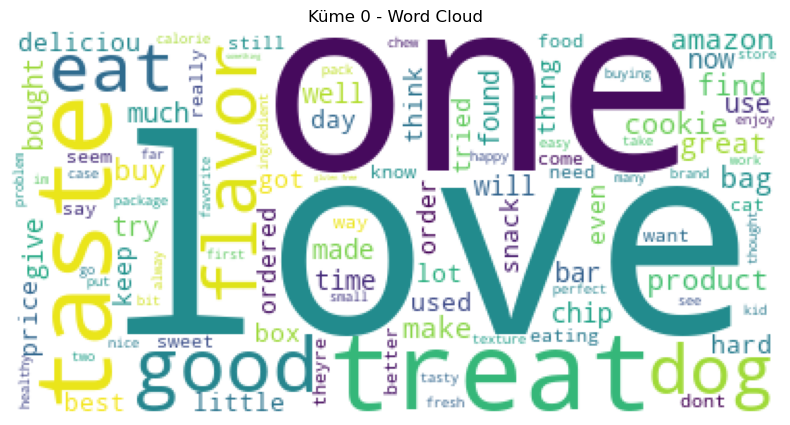

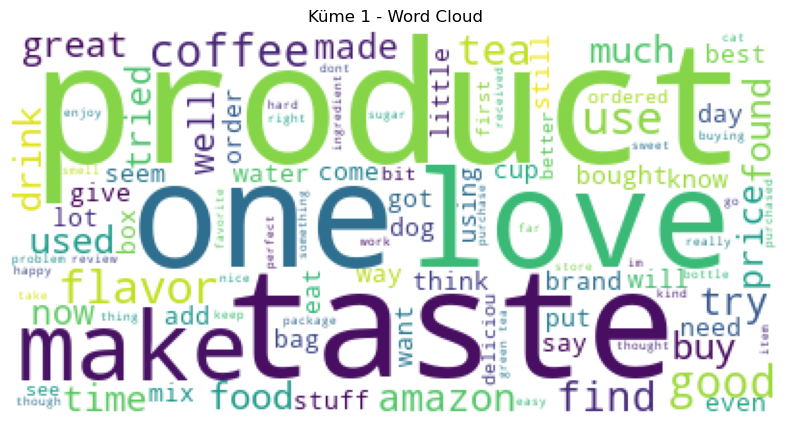

In [11]:
# Küme 0 wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(background_color='white', max_words=100).generate(cluster_0_text))
plt.title("Küme 0 - Word Cloud")
plt.axis("off")
plt.show()

# Küme 1 wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(background_color='white', max_words=100).generate(cluster_1_text))
plt.title("Küme 1 - Word Cloud")
plt.axis("off")
plt.show()

## Sonuç ve Yorum

Bu analizde, Amazon yorumları üzerinde gözetimsiz bir yöntem olan KMeans kullanılarak kümelendirme yapılmıştır. Bu yaklaşım özellikle etiketlenmemiş büyük veri setlerinde faydalıdır. 

Gelecekte, bu kümeler üzerinden manuel etiketleme yapılabilir veya öneri sistemleri için kullanılabilir.